In [1]:
from __future__ import print_function
import keras
from data_utils_2 import load_CIFAR10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os
%matplotlib inline


Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = (16.0, 9.0) # set default size of plots

In [3]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r',label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b',linestyle='-.', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', linestyle='-.' ,label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [4]:
batch_size = 512
num_classes = 10
epochs = 200
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
#创建一个实例history
history = LossHistory()

In [5]:
# The data, shuffled and split between train and test sets:
cifar10_dir = 'F:/course/统计学习方法/cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_CIFAR10(cifar10_dir)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [ ]:
#load a model
model=keras.models.load_model('D:/GitHub/statlearning/saved_models/keras_cifar10_trained_model.h5')

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model.fit(x_train, y_train,
              batch_size=batch_size,verbose=2,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,callbacks=[history])

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 13s - loss: 2.0946 - acc: 0.2222 - val_loss: 1.9224 - val_acc: 0.3221
Epoch 2/200
 - 8s - loss: 1.8601 - acc: 0.3304 - val_loss: 1.8177 - val_acc: 0.3588
Epoch 3/200
 - 8s - loss: 1.7399 - acc: 0.3742 - val_loss: 1.6439 - val_acc: 0.4200
Epoch 4/200
 - 8s - loss: 1.6681 - acc: 0.3987 - val_loss: 1.5836 - val_acc: 0.4362
Epoch 5/200
 - 8s - loss: 1.6080 - acc: 0.4178 - val_loss: 1.5203 - val_acc: 0.4539
Epoch 6/200
 - 8s - loss: 1.5603 - acc: 0.4368 - val_loss: 1.4676 - val_acc: 0.4714
Epoch 7/200
 - 8s - loss: 1.5245 - acc: 0.4513 - val_loss: 1.4376 - val_acc: 0.4895
Epoch 8/200
 - 8s - loss: 1.4892 - acc: 0.4658 - val_loss: 1.4161 - val_acc: 0.4953
Epoch 9/200
 - 8s - loss: 1.4591 - acc: 0.4777 - val_loss: 1.3784 - val_acc: 0.5087
Epoch 10/200
 - 8s - loss: 1.4292 - acc: 0.4859 - val_loss: 1.3801 - val_acc: 0.5095
Epoch 11/200
 - 8s - loss: 1.4054 - acc: 0.5002 - val_loss: 1.4416 - val_acc: 0.4959
Epoch 12/200
 - 8s - lo

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\GitHub\statlearning\saved_models\keras_cifar10_trained_model.h5 


In [12]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.642157150316
Test accuracy: 0.794


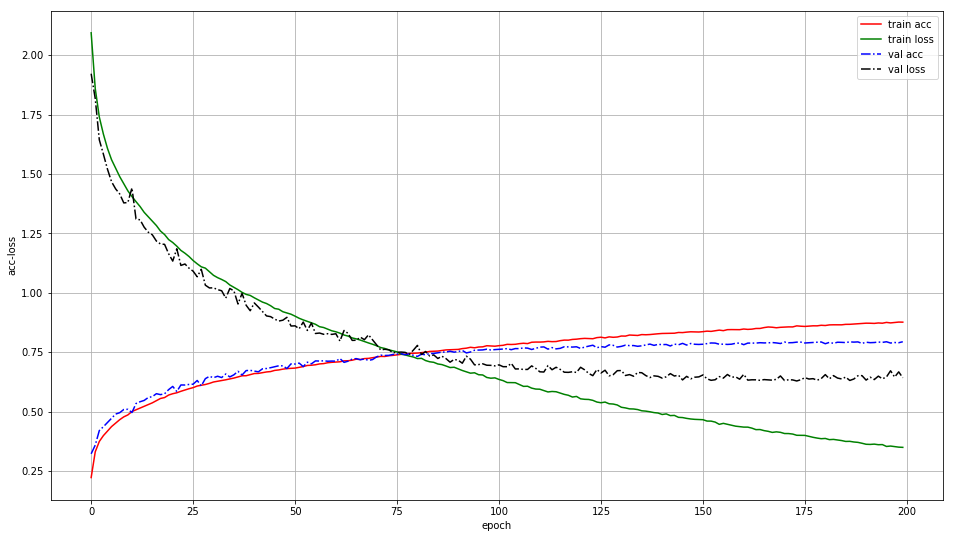

In [13]:
#绘制acc-loss曲线
history.loss_plot('epoch')